In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
import cartopy as ccrs
import os
import matplotlib.image as mpimg


c:\Users\chloe\anaconda3\envs\wbm_env\Lib\site-packages\pyproj\network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [ ]:
# what uppppppppp

hi chloe can u see this

In [3]:
oldest = pd.read_csv('https://raw.githubusercontent.com/mishlim/Crop-Balance-chloemish/refs/heads/main/crops1950_1999.csv') # from 1950 - 1999
now = pd.read_csv('https://raw.githubusercontent.com/mishlim/Crop-Balance-chloemish/refs/heads/main/crops2000_23.csv') # from 2000 - 2023


creagroops = oldest.merge(now, how='inner')
creagroops_de = creagroops[creagroops["geo\TIME_PERIOD"]=="DE"]

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\chloe\AppData\Local\Temp\ipykernel_4244\4137016907.py:6: SyntaxWarning: invalid escape sequence '\T'
  creagroops_de = creagroops[creagroops["geo\TIME_PERIOD"]=="DE"]


In [4]:
creagroops_de.head()

,freq,crops,strucpro,geo\TIME_PERIOD,1950,1951,1952,1953,1954,1955,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
7,A,ARA,MA,DE,:,:,:,:,:,8167.81,...,11763,11771.9,11730.9,11713.7,11663.8,11657.9,11657,11681.4,:,:
35,A,ARA99,MA,DE,:,:,:,:,:,0,...,11.6,14.1,15.6,15.2,27.8,30.2,29.7,56.7,:,:
61,A,C0000,AR,DE,:,:,:,:,:,4839.9,...,6325,6276.2,6148.9,6380,6074.9,6063.5,6112.5,6076.2,5757.9,:
92,A,C0000,MA,DE,:,:,:,:,:,4839.87,...,6325,6276.2,6148.9,6380,6074.9,6063.5,6112.5,6076.2,:,:
123,A,C1000,AR,DE,:,:,:,:,:,4839.9,...,6325,6276.2,6148.9,6380,6074.9,6063.5,6112.5,6076.2,5757.9,:


In [5]:
wheat = creagroops_de[creagroops_de["crops"]=="C1100"]

rapeseed = creagroops_de[creagroops_de["crops"]=="I1110"]

In [6]:
rapeseed.head()

,freq,crops,strucpro,geo\TIME_PERIOD,1950,1951,1952,1953,1954,1955,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
1377,A,I1110,AR,DE,:,:,:,:,:,12,...,1325.7,1308.9,1228.3,856.8,957.7,1000.9,1088.2,1178.2,1088.3,:


In [7]:
wheat.head()

,freq,crops,strucpro,geo\TIME_PERIOD,1950,1951,1952,1953,1954,1955,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
154,A,C1100,AR,DE,:,:,:,:,:,1181.4,...,3201.7,3202.6,3036.3,3118.1,2835.5,2939,2980.9,2897.8,2615.2,:


In [8]:
wheat.columns

Index(['freq', 'crops', 'strucpro', 'geo\TIME_PERIOD', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025'],
      dtype='object')

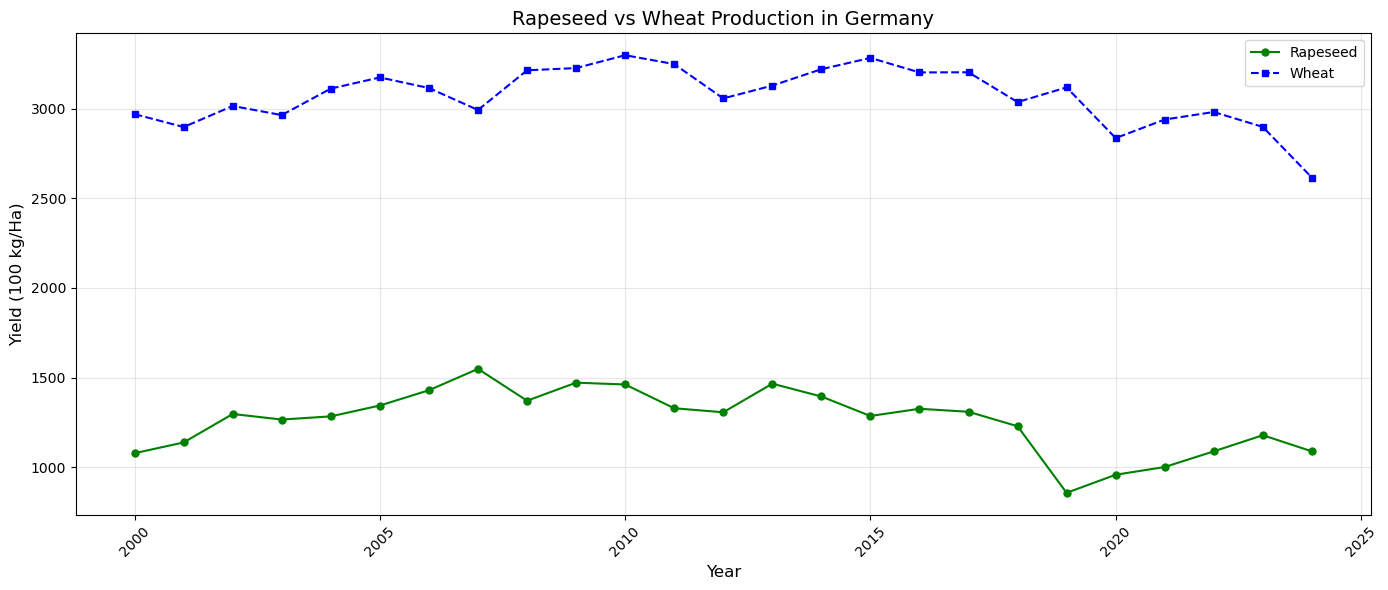

In [9]:
year_columns = [str(year) for year in range(2000, 2026)]
years = np.arange(2000, 2026)

# Process rapeseed data
data_row_rapeseed = rapeseed.iloc[0]
values_rapeseed = pd.to_numeric(data_row_rapeseed[year_columns], errors='coerce')

# Process wheat data
data_row_wheat = wheat.iloc[0]
values_wheat = pd.to_numeric(data_row_wheat[year_columns], errors='coerce')

# Create a single plot
plt.figure(figsize=(14, 6))

# Plot both lines
plt.plot(years, values_rapeseed, marker='o', linestyle='-', color='green', label='Rapeseed', markersize=5)
plt.plot(years, values_wheat, marker='s', linestyle='--', color='blue', label='Wheat', markersize=5)

# Customize the plot
plt.title('Rapeseed vs Wheat Production in Germany', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yield (100 kg/Ha)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(np.arange(2000, 2026, 5), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
global data_path, output_path
# data_path = "D:/ALSM/datas/" # Mishtee
data_path = "C:/Users/chloe/Freiburg Uni/Second Semester/Applied Land surface Modelling/data/" # Chloe
# output_path = "D:/ALSM/output" # Mishtee
output_path = "C:/Users/chloe/Freiburg Uni/Second Semester/Applied Land surface Modelling/outputs/" # Chloe


def calc_et_weight(temp, lai, w):
    """Calculate influence of LAI and temperature on ET.
    Input: temp: temperature data [K]
           lai: leaf area index data [m**2/m**2]
           w: weights for temperature and lai"""
    # Get coefficients for temperature and lai
    temp_w, lai_w = w
    lai = np.nan_to_num(lai, nan=0)
    temp_min = temp.min()
    temp_max = temp.max()
    lai_min = lai.min()
    lai_max = lai.max()

    # Perform normalization
    normalized_temp = (temp - temp_min) / (temp_max - temp_min)
    normalized_lai = (lai - lai_min) / (lai_max - lai_min)

    # Weight Temperature and LAI
    et_coef = temp_w * normalized_temp + lai_w * normalized_lai
    return et_coef

def water_balance(w_t, prec_t, rad_t, snow_t, temp_t, cs, alpha, beta, gamma, c_m):
    """ Calculates the water balance for one time step as introduced in the lecture. Added features, such as snow"""
    snow_t, prec_t = snow_function(snow_t, prec_t, temp_t,
                             c_m)  # overwrites the precipitation (if snow melts or precipitation is accumulated as snow)
    runoff_t = runoff(w_t, prec_t, cs, alpha)
    evapo_t = evapotranspiration(w_t, rad_t, cs, beta, gamma)
    w_next = w_t + (prec_t - evapo_t - runoff_t)
    w_next = np.maximum(0, w_next)
    
    return runoff_t, evapo_t, w_next, snow_t

def runoff(w_t, prec_t, cs, alpha):
    return prec_t * (w_t / cs)  #alpha

def evapotranspiration(w_t, rad_t, cs, beta, gamma):
    return beta * (w_t / cs) # gamma * rad_t

def snow_function(snow_t, prec_t, temp_t, c_m):
    # Determine if temperature is above freezing (melting condition)
    is_melting = temp_t > 273.15
    
    # Determine if there is already snow on the ground
    has_snow = snow_t >= 0.001

    if not is_melting:
        # Temperature is below or at freezing → precipitation adds to snow
        snow_out = snow_t + prec_t
        water_out = 0.0
    elif is_melting and has_snow:
        # Snow is present and temperature is above freezing → melt snow
        SnowMelt = c_m * (temp_t - 273.15)
        snow_out = snow_t - SnowMelt
        if snow_out < 0:
            SnowMelt = snow_t  # Can't melt more than exists
            snow_out = 0.0
        water_out = SnowMelt + prec_t
    else:
        # No snow, and temperature above freezing → all precip is rain
        snow_out = snow_t
        water_out = prec_t

    return snow_out, water_out

def time_evolution(temp, rad, prec, lai, params):
    runoff_out = np.full_like(temp, np.nan)
    evapo_out = np.full_like(temp, np.nan)
    soil_mois_out = np.full_like(temp, np.nan)
    snow_out = np.full_like(temp, np.nan)
    
    if np.all(np.isnan(lai)):
        #edge case for no vegetation
        return runoff_out, evapo_out, soil_mois_out, snow_out
    cs, alpha, gamma, beta, c_m, et_weight = params
    #conversion factor

    conv = 1 / 2260000  # from J/day/m**2 to mm/day
    rad = rad * conv  # convert radiation to mm/day
    prec = prec * 10 **3 # from m/day to mm/day
    
    w_0 = 0.9 * cs
    snow_0 = 0
    
    beta_weighted = beta * calc_et_weight(temp, lai, et_weight)
    
    for t in range(1, len(temp)):
        prec_t = prec[t-1]
        temp_t = temp[t-1]
        rad_t = rad[t-1]
        beta_weighted_t = beta_weighted[t-1]
        runoff_out[t], evapo_out[t], soil_mois_out[t], snow_out[t] = water_balance(
            w_0, prec_t, rad_t, snow_0, temp_t, cs, alpha, beta_weighted_t, gamma, c_m)
        w_0 = soil_mois_out[t]
        snow_0 = snow_out[t]
        
    return runoff_out, evapo_out, soil_mois_out, snow_out

In [51]:
def monthly_scale(data, params):
    """Calculate water balance components at monthly scale.
    Input: data - xarray Dataset with all input variables
           params - model parameters
    Output: xarray Dataset with monthly water balance components"""
    
    # Aggregate input data to monthly scale first
    monthly_data = xr.Dataset()
    
    # Precipitation needs to be summed (total per month)
    monthly_data['precipitation'] = data['precipitation'].resample(time='1ME').sum()
    
    # Temperature and radiation are averaged
    monthly_data['temperature'] = data['temperature'].resample(time='1ME').mean()
    monthly_data['radiation'] = data['radiation'].resample(time='1ME').mean()
    
    # LAI - we'll take the mean, but could also consider max for growing season
    monthly_data['lai'] = data['lai'].resample(time='1ME').mean()
    
    # Calculate water balance at monthly scale
    print('Starting monthly model run...')
    runoff, evapo, soil_mois, snow = xr.apply_ufunc(
        time_evolution,
        monthly_data['temperature'],
        monthly_data['radiation'],
        monthly_data['precipitation'],
        monthly_data['lai'],
        kwargs={'params': params},
        input_core_dims=[['time'], ['time'], ['time'], ['time']],
        output_core_dims=[['time'], ['time'], ['time'], ['time']],
        vectorize=True,
        dask='allowed',
        output_dtypes=[np.float64, np.float64, np.float64, np.float64])
    
    monthly_results = xr.Dataset({
        'runoff': runoff,
        'evapotranspiration': evapo,
        'soil_moisture': soil_mois,
        'snow': snow
    }, coords={"time": monthly_data['time']})
    
    return monthly_results

def annual_scale(data, params):
    """Calculate water balance components at annual scale.
    Input: data - xarray Dataset with all input variables
           params - model parameters
    Output: xarray Dataset with annual water balance components"""
    
    # Aggregate input data to annual scale first
    annual_data = xr.Dataset()
    
    # Precipitation needs to be summed (total per year)
    annual_data['precipitation'] = data['precipitation'].resample(time='YE').sum()
    
    # Temperature and radiation are averaged
    annual_data['temperature'] = data['temperature'].resample(time='YE').mean()
    annual_data['radiation'] = data['radiation'].resample(time='YE').mean()
    
    # LAI - annual mean (could also consider growing season mean)
    annual_data['lai'] = data['lai'].resample(time='YE').mean()
    
    # Calculate water balance at annual scale
    print('Starting annual model run...')
    runoff, evapo, soil_mois, snow = xr.apply_ufunc(
        time_evolution,
        annual_data['temperature'],
        annual_data['radiation'],
        annual_data['precipitation'],
        annual_data['lai'],
        kwargs={'params': params},
        input_core_dims=[['time'], ['time'], ['time'], ['time']],
        output_core_dims=[['time'], ['time'], ['time'], ['time']],
        vectorize=True,
        dask='allowed',
        output_dtypes=[np.float64, np.float64, np.float64, np.float64])
    
    annual_results = xr.Dataset({
        'runoff': runoff,
        'evapotranspiration': evapo,
        'soil_moisture': soil_mois,
        'snow': snow
    }, coords={"time": annual_data['time']})
    
    return annual_results

def load_data():
    print('Loading data...')
    temperature = xr.open_mfdataset(data_path + 'daily_average_temperature/*.nc', combine='by_coords').load()
    precipitation = xr.open_mfdataset(data_path + 'total_precipitation/*.nc', combine='by_coords').load()
    radiation = xr.open_mfdataset(data_path + 'net_radiation/*.nc', combine='by_coords').load()
    lai = xr.open_mfdataset(data_path + 'lai_full/*.nc', combine='by_coords').load()
    global data 
    data = xr.Dataset()
    data['temperature'] = temperature['t2m']
    data['precipitation'] = precipitation['tp']
    data['radiation'] = radiation['nr']
    data['lai'] = lai['lai']

In [52]:
#get rid of anythin before 2002 and after 2018


def main():
    params = [420, 8, 0.2, 0.8, 1.5, (0.75, 0.25)]     # cs, alpha, gamma, beta, c_m, et_weight
    
    # Load data
    load_data()

    global data
    data = data.sel(time=slice('2000-01-01', '2023-12-31'))

    # Daily scale (original calculation)
    print('Starting daily model run...')
    runoff_daily, evapo_daily, soil_mois_daily, snow_daily = xr.apply_ufunc(
        time_evolution,
        data['temperature'],
        data['radiation'],
        data['precipitation'],
        data['lai'],
        kwargs={'params': params},
        input_core_dims=[['time'], ['time'], ['time'], ['time']],
        output_core_dims=[['time'], ['time'], ['time'], ['time']],
        vectorize=True,
        dask='allowed',
        output_dtypes=[np.float64, np.float64, np.float64, np.float64])
    
    daily_results = xr.Dataset({
        'runoff': runoff_daily,
        'evapotranspiration': evapo_daily,
        'soil_moisture': soil_mois_daily,
        'snow': snow_daily
    }, coords={"time": data['time']})
    
    # Monthly scale
    monthly_results = monthly_scale(data, params)
    
    # Annual scale
    annual_results = annual_scale(data, params)
    
    # Create output folder
    os.makedirs(output_path, exist_ok=True)
    
    # Save all datasets
    daily_results.to_netcdf(output_path+'daily_output.nc')
    monthly_results.to_netcdf(output_path+'monthly_output.nc')
    annual_results.to_netcdf(output_path+'annual_output.nc')
    print('Saved model outputs to', output_path)
    
    # Create plots for all time scales
    create_results_plot(daily_results, 'Daily')
    create_results_plot(monthly_results, 'Monthly')
    create_results_plot(annual_results, 'Annual')
    
def create_results_plot(res, time_scale):
    print(f'Creating {time_scale} results plot...')
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    res_freiburg = res.sel(lat=47.999, lon=7.845, method='nearest')
    
    if time_scale == 'Annual':
        res_freiburg['runoff'].to_series().plot(ax=axs[0, 0], label='Runoff')
        res_freiburg['evapotranspiration'].to_series().plot(ax=axs[0, 1], label='Evapotranspiration')
        res_freiburg['soil_moisture'].to_series().plot(ax=axs[1, 0], label='Soil Moisture')
        res_freiburg['snow'].to_series().plot(ax=axs[1, 1], label='Snow')
    else:
        res_freiburg['runoff'].plot(ax=axs[0, 0], label='Runoff')
        res_freiburg['evapotranspiration'].plot(ax=axs[0, 1], label='Evapotranspiration')
        res_freiburg['soil_moisture'].plot(ax=axs[1, 0], label='Soil Moisture')
        res_freiburg['snow'].plot(ax=axs[1, 1], label='Snow')

    axs[0, 0].set_title('Runoff')
    axs[0, 1].set_title('Evapotranspiration')
    axs[1, 0].set_title('Soil Moisture')
    axs[1, 1].set_title('Snow')

    for ax in axs.flat:
        ax.set_xlabel('Time')

    plt.suptitle(f'Water Balance Components at Freiburg ({time_scale} Scale)')
    plt.tight_layout()
    plt.savefig(output_path + f'water_balance_{time_scale.lower()}.png')
    plt.close()


if __name__ == "__main__":
    main()

Loading data...
Starting daily model run...
Starting monthly model run...
Starting annual model run...
Saved model outputs to C:/Users/chloe/Freiburg Uni/Second Semester/Applied Land surface Modelling/outputs/
Creating Daily results plot...
Creating Monthly results plot...
Creating Annual results plot...


In [49]:
#output_daily = mpimg.imread("D:/ALSM/outputwater_balance_daily.png") # Mishtee
#output_monthly = mpimg.imread("D:/ALSM/outputwater_balance_monthly.png") # Mishtee

output_daily = mpimg.imread("C:/Users/chloe/Freiburg Uni/Second Semester/Applied Land surface Modelling/outputs/water_balance_daily.png")
output_monthly = mpimg.imread("C:/Users/chloe/Freiburg Uni/Second Semester/Applied Land surface Modelling/outputs/water_balance_monthly.png")
output_yearly = mpimg.imread("C:/Users/chloe/Freiburg Uni/Second Semester/Applied Land surface Modelling/outputs/water_balance_annual.png")

(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

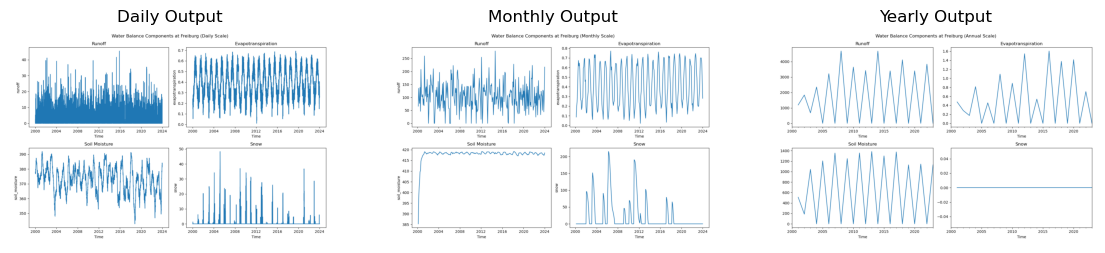

In [50]:
fig, axs = plt.subplots(1,3, figsize=(14,6))

axs[0].imshow(output_daily)
axs[0].set_title("Daily Output")
axs[0].axis('off')

axs[1].imshow(output_monthly)
axs[1].set_title("Monthly Output")
axs[1].axis('off')

axs[2].imshow(output_yearly)
axs[2].set_title("Yearly Output")
axs[2].axis('off')


In [12]:
soil_moisture_data = xr.open_dataset("D:/ALSM/outputdaily_output.nc")


In [13]:
soil_moisture = soil_moisture_data['soil_moisture']


In [14]:
soil_moisture_array = soil_moisture.values


In [15]:
# Transpose the data to a long format
wheat_long = wheat.melt(id_vars=['freq', 'crops', 'strucpro', r'geo\TIME_PERIOD'], 
                         var_name='year', value_name='yield')

# Convert the year column to numeric
wheat_long['year'] = pd.to_numeric(wheat_long['year'])

# Remove non-numeric values from the yield column
wheat_long['yield'] = pd.to_numeric(wheat_long['yield'], errors='coerce')

# Drop rows with missing values in the yield column
wheat_long = wheat_long.dropna(subset=['yield'])

# Calculate the rolling average yield over a certain window of years (e.g., 5 years)
wheat_long['rolling_average_yield'] = wheat_long.groupby(r'geo\TIME_PERIOD')['yield'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())


# Calculate the rolling average yield over a certain window of years (e.g., 5 years)
wheat_long['rolling_average_yield'] = wheat_long.groupby(r'geo\TIME_PERIOD')['yield'].transform(lambda x: x.rolling(window=5).mean())

# Calculate the yield decrease for each year
wheat_long['yield_decrease'] = (wheat_long['rolling_average_yield'] - wheat_long['yield']) / wheat_long['rolling_average_yield']


In [16]:
wheat_long

,freq,crops,strucpro,geo\TIME_PERIOD,year,yield,rolling_average_yield,yield_decrease
5,A,C1100,AR,DE,1955,1181.4,NaN,NaN
6,A,C1100,AR,DE,1956,1155.3,NaN,NaN
7,A,C1100,AR,DE,1957,1231.5,NaN,NaN
8,A,C1100,AR,DE,1958,1313.9,NaN,NaN
9,A,C1100,AR,DE,1959,1341.7,1244.76,-0.077878
...,...,...,...,...,...,...,...,...
70,A,C1100,AR,DE,2020,2835.5,3078.84,0.079036
71,A,C1100,AR,DE,2021,2939.0,3026.30,0.028847
72,A,C1100,AR,DE,2022,2980.9,2981.96,0.000355
73,A,C1100,AR,DE,2023,2897.8,2954.26,0.019111


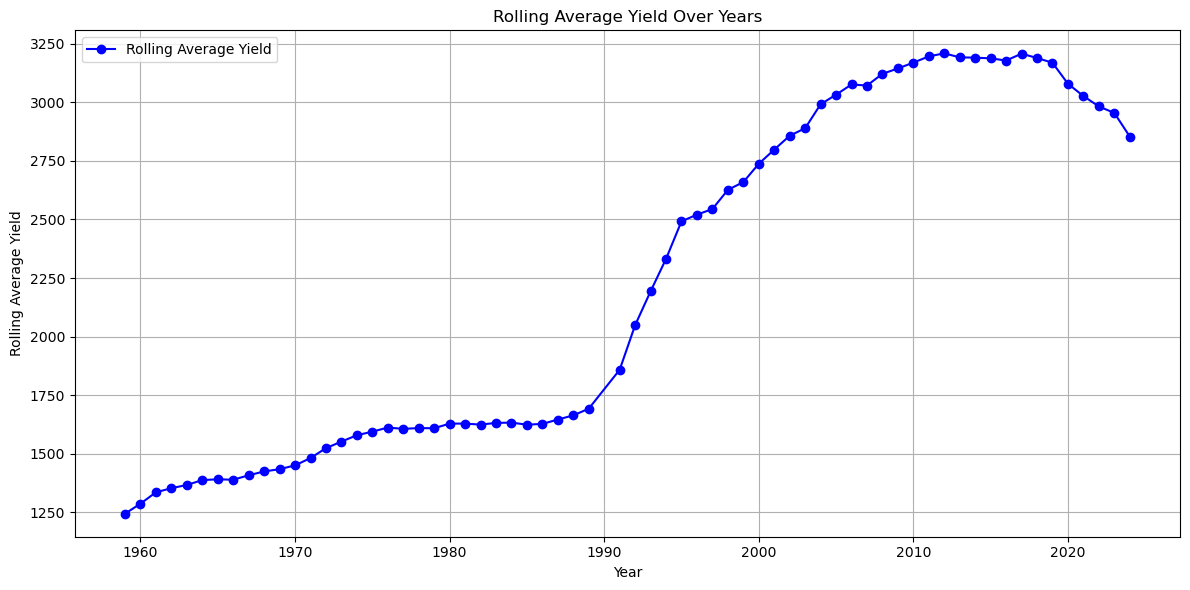

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(wheat_long["year"], wheat_long["rolling_average_yield"], label="Rolling Average Yield", color='blue', marker='o')
plt.xlabel("Year")
plt.ylabel("Rolling Average Yield")
plt.title("Rolling Average Yield Over Years")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
#tentative code for soil moisture deficits vs crop yield decreases



# Load soil moisture data from water balance model

# Calculate soil moisture deficits
#soil_moisture_array['soil_moisture_deficit'] = soil_moisture_array['max_soil_moisture'] - soil_moisture_array['actual_soil_moisture']

# Plot soil moisture deficits against crop yield decreases
#plt.scatter(soil_moisture_array['soil_moisture_deficit'], wheat['yield_decrease'])
#plt.xlabel('Soil Moisture Deficit')
#plt.ylabel('Crop Yield Decrease')
#plt.title('Relationship between Soil Moisture Deficits and Crop Yield Decreases')
#plt.show()

# Calculate correlation coefficient
#correlation_coefficient = np.corrcoef(soil_moisture_array['soil_moisture_deficit'], wheat['yield_decrease'])[0, 1]
#print('Correlation coefficient:', correlation_coefficient)


# Part 2 - Extreme Events
